# [**Sélection de caractéristiques univariées**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_13_feature_selection/plot_feature_selection.ipynb)<br/>([_Univariate Feature Selection_](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html))

Ce cahier d'exemple illustre l'utilisation de la sélection de caractéristiques univariées pour améliorer l'exactitude' de la classification sur un jeu de données bruyant.

Dans cet exemple, des caractéristiques bruyantes (non informatives) sont ajoutées à l'ensemble de données Iris. Une machine à vecteurs de support (SVM) est utilisée pour classifier l'ensemble de données avant et après l'application de la sélection de caractéristiques univariées. Pour chaque caractéristique, nous représentons les valeurs p pour la sélection de caractéristiques univariées et les poids correspondants des SVM. Ainsi, nous comparerons l'exactitude du modèle et examinerons l'impact de la sélection de caractéristiques univariées sur les poids du modèle.

# Générer des données d'échantillon

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Sélection de caractéristiques univariées

Sélection de caractéristiques univariées avec le test F pour l'évaluation des caractéristiques. Nous utilisons la fonction de sélection par défaut pour sélectionner les quatre caractéristiques les plus significatives.

In [2]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

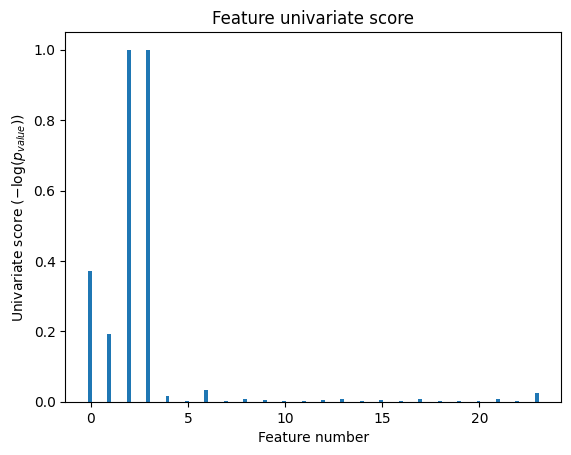

In [6]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-\log(p_{value})$)")
plt.show()

Dans l'ensemble complet de caractéristiques, seules les 4 caractéristiques originales sont significatives. Nous pouvons voir qu'elles obtiennent le score le plus élevé avec la sélection de caractéristiques univariées.

# Comparaison avec les SVM

Sans sélection de caractéristiques univariées

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC(dual="auto"))
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.789


Après la sélection de caractéristiques univariées

In [8]:
clf_selected = make_pipeline(
    SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC(dual="auto")
)
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

Classification accuracy after univariate feature selection: 0.868


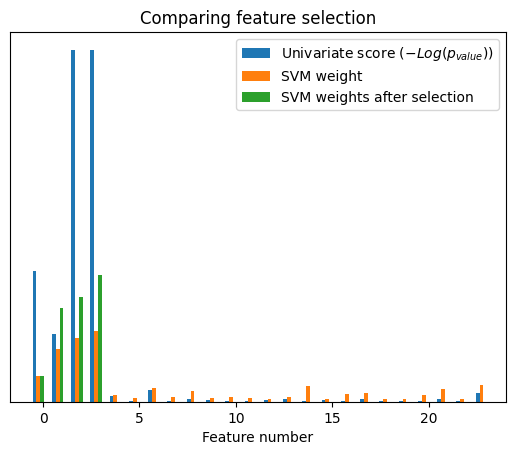

In [9]:
plt.bar(
    X_indices - 0.45, scores, width=0.2, label=r"Univariate score ($-Log(p_{value})$)"
)

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label="SVM weight")

plt.bar(
    X_indices[selector.get_support()] - 0.05,
    svm_weights_selected,
    width=0.2,
    label="SVM weights after selection",
)

plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()

Sans sélection de caractéristiques univariées, les SVM attribuent un poids élevé aux 4 premières caractéristiques originales significatives, mais sélectionnent également de nombreuses caractéristiques non informatives. L'application de la sélection de caractéristiques univariée avant les SVM augmente le poids attribué par les SVM aux caractéristiques significatives, et améliorera ainsi la classification.